- [from sklearn.metrics import mean_absolute_error, mean_squared_error](#metrics)
- [np.sqrt()](#sqrt)

---
---

__Regression__ is a task when a model attempts __to predict continuous values__ (unlike categorical values, which is a classification task).

Some of the most common __evaluation metrics for regression__:
- Mean Absolute Error
- Mean Squared Error
- Root Mean Square Error

---

## `Mean Absolute Error (MAE)`

__MAE won't punish large errors however.__

<img src='mae.png' width=800>

Unfortunately, it's not going to punish when you're really off for just a few points.

---
---

## `Mean Squared Error (MSE)`

We want some sort of reporting metric that those take into account if you're extremely off even for just a few points.
<br>To fix this, what we could do is use a mean squared error.

<img src='mse.png' width=800>

And when you __square the difference__, you're going to __really punish__ your model that __if it has a large error__, even for just a few points, __squaring__ it is really going to __increase the overall affect on the average__ of those few points that are really far off.

There is an issue with mean squared error, and fundamentally the issue is that it's actually reporting back your __error in different units__ than your original Y value. So what it's actually reporting are __units of Y squared__.
- If we think back to the example of predicting the price of a house, mean absolute error would report back your error in terms of dollars. It would say, on average you're off by X amount of dollars here.
- Here, if we were to report back mean squared error, we would actually be reporting back how far you're off in squared dollars. And that's really hard to interpret.

---
---

## `Root Mean Square Error (RMSE)`

So, what we could do is to fix this issue and get it back into units of the original Y, we'll simply take the square root of everything after we're done and it's RMSE. And it's really analogous to a standard deviation instead of reporting back variance.

<img src='rmse.png' width=800>

And this is one of the most popular metrics because it's going to __punish those larger errors by squaring__ them. And it also fixes the issue of the squared units of Y by taking the square root, since this is reporting back your __error in the same units as your original Y value__ and it's punishing those larger values.

<img src='goodValueForRMSE.png' width=800>

You should also be __comparing your error metric to the average value of the label__ in your data set to try to get an intuition of its overall performance.

---
---
---
---

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('Advertising.csv')

In [3]:
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [4]:
X = df.drop('sales', axis=1)
y = df['sales']

In [5]:
from sklearn.model_selection import train_test_split

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [7]:
from sklearn.linear_model import LinearRegression

In [8]:
model = LinearRegression()

In [11]:
model.fit(X_train, y_train)

LinearRegression()

In [13]:
X_test.head()

,TV,radio,newspaper
37,74.7,49.4,45.7
109,255.4,26.9,5.5
31,112.9,17.4,38.6
89,109.8,47.8,51.4
66,31.5,24.6,2.2


In [14]:
y_test.head()

37     14.7
109    19.8
31     11.9
89     16.7
66      9.5
Name: sales, dtype: float64

In [15]:
test_predictions = model.predict(X_test)
test_predictions # It's just an array of predicted values.

array([15.74131332, 19.61062568, 11.44888935, 17.00819787,  9.17285676,
        7.01248287, 20.28992463, 17.29953992,  9.77584467, 19.22194224,
       12.40503154, 13.89234998, 13.72541098, 21.28794031, 18.42456638,
        9.98198406, 15.55228966,  7.68913693,  7.55614992, 20.40311209,
        7.79215204, 18.24214098, 24.68631904, 22.82199068,  7.97962085,
       12.65207264, 21.46925937,  8.05228573, 12.42315981, 12.50719678,
       10.77757812, 19.24460093, 10.070269  ,  6.70779999, 17.31492147,
        7.76764327,  9.25393336,  8.27834697, 10.58105585, 10.63591128,
       13.01002595,  9.77192057, 10.21469861,  8.04572042, 11.5671075 ,
       10.08368001,  8.99806574, 16.25388914, 13.23942315, 20.81493419,
       12.49727439, 13.96615898, 17.56285075, 11.14537013, 12.56261468,
        5.50870279, 23.29465134, 12.62409688, 18.77399978, 15.18785675])

In [17]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

# and for the root mean square error (RMSE), I can simply take the square root of mean squared error

In [18]:
df['sales'].mean()

14.022500000000003

<AxesSubplot:xlabel='sales', ylabel='Count'>

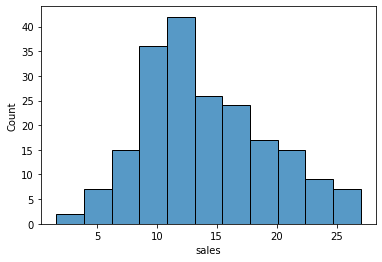

In [22]:
sns.histplot(data=df, x='sales')

<AxesSubplot:xlabel='sales', ylabel='Count'>

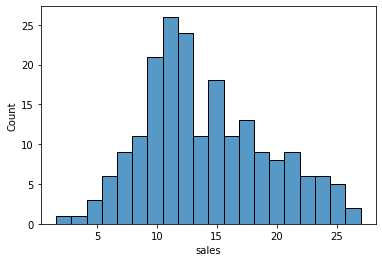

In [23]:
sns.histplot(data=df, x='sales', bins=20)

In [29]:
mean_absolute_error(y_test, test_predictions)

# its around 10% of the mean y target value

1.2137457736144808

So the obvious question is, is this a good mean_absolute_error value?

Of course, context is everything. Did I already have a historical model that tried to predict sales based off features? If so, I should be comparing my current mean absolute error to that historical model.

I can see that my average sales value is about 14 and I can see the distribution kind of goes from five to twenty five. <br>And then my mean absolute error is 1.2137457736144808, basically, on average, I'm off by 1.21. <br>Is that good or bad when compared to 14? Let's say, it's a 10 percent error range.

So, on data that the model has never seen before, on average is going to be off by 1.21, which if I compare it to my average sales value, is a little less than 10 percent.

---

But this (MAE), again, doesn't take into account situations where my model could be really far off for just a few points. For that, I'm going to want mean squared error and then root mean square error.

In [26]:
mean_squared_error(y_test, test_predictions)

2.298716697886378

This value, however, I cannot directly compare to the mean because this is now in squared terms of y.

In [28]:
# RMSE

np.sqrt(mean_squared_error(y_test, test_predictions))

1.5161519375993877

It's kind of around that 10 percent range.

---

### !!!

So what I like to do is kind of __use both mean absolute error__ to make sure on average I'm doing pretty good and also __root mean square error__ to make sure I'm not super far off for just a few data points.

---

If you got a __mean absolute error__ that was performing __OK__, but you got a really __horrible root mean square error__, then that's basically informing you that your model is performing pretty well for most points. But you have a few data points where you're way off and that is going to show up when you're squaring that error.

MAE won't let you know how well you are performing on outliers.

---

- What is the relationship between "Cost Function" and MAE/RMSE?
  - You mean a direct relationship? There isn't really one. They aren't related as cost function and final RMSE are on two different data sets. 

---

MAE calculates the mean error but it does not account the outliers means it is not capable of telling how well our model is when we have outliers.

But in case of RMSE, it tells us that if I am(RMSE) large means your model is not good for outliers but if I am small means model is performing well for every data point even for outliers.

---